In [21]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statistics as stat
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN

In [2]:
Housing_Data=pd.read_csv('Housing_Data_5.csv')
Housing_Data

,Unnamed: 0,bathrooms,bedrooms,city,country,currency,latitude,livingArea,longitude,lotAreaUnit,priceForHDP,rentZestimate,state,streetAddress,taxAssessedValue,zestimate,zipcode,priceinmil,lotArea
0,0,4.0,4.0,Denver,USA,USD,39.724728,2202.0,-104.959140,sqft,1500000.0,3170.0,CO,530 University Boulevard,726200.0,1031000.0,80206,1.5000,3.6290
1,1,3.0,4.0,Denver,USA,USD,39.648630,2659.0,-105.055405,sqft,725000.0,2429.0,CO,3781 S Benton Way,444900.0,455700.0,80235,0.7250,12.2150
2,2,5.0,4.0,Denver,USA,USD,39.770897,3991.0,-105.013214,sqft,1800000.0,7454.0,CO,3926 Vallejo Street,621200.0,1395200.0,80211,1.8000,6.2500
3,3,5.0,6.0,Denver,USA,USD,39.665450,3838.0,-104.963524,sqft,1500000.0,3746.0,CO,2832 S Race Street,712500.0,1474576.0,80210,1.5000,8.7120
4,4,3.0,4.0,Denver,USA,USD,39.769943,2292.0,-105.021260,sqft,1200000.0,3405.0,CO,2730 W Denver Place,216300.0,870300.0,80211,1.2000,4.9050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,838,2.0,3.0,Mills,USA,USD,42.835503,3372.0,-106.413000,sqft,449900.0,2128.0,WY,1302 River Heights Dr,327731.0,431700.0,82604,0.4499,11.7612
839,839,2.0,4.0,Douglas,USA,USD,42.763844,2304.0,-105.382230,sqft,110000.0,1935.0,WY,403 N 4th St,135752.0,169900.0,82633,0.1100,11.3256
840,840,2.0,3.0,Evanston,USA,USD,41.254820,1150.0,-110.959460,sqft,159000.0,1195.0,WY,801 Sioux Dr,114419.0,149900.0,82930,0.1590,0.5760
841,841,4.0,6.0,Gillette,USA,USD,44.245415,5022.0,-105.562035,sqft,998000.0,3622.0,WY,5221 Rocky Point Dr,638339.0,728600.0,82718,0.9980,424.2744


In [3]:
url = "https://zillow56.p.rapidapi.com/search"

querystring = {"location":"CO"}

headers = {
	"X-RapidAPI-Key": "b7deeaff60msh45cc7a51580d4d2p1920fajsn0a24d20d8fa0",
	"X-RapidAPI-Host": "zillow56.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)
print(response.json())

#data=pd.DataFrame(response.json())

{'results': [{'city': 'Woodland Park', 'country': 'USA', 'currency': 'USD', 'daysOnZillow': 0, 'homeStatus': 'FOR_SALE', 'homeStatusForHDP': 'FOR_SALE', 'homeType': 'LOT', 'imgSrc': 'https://photos.zillowstatic.com/fp/8f136549a9c832b8a6960c17e47a91d1-p_e.jpg', 'isFeatured': False, 'isNonOwnerOccupied': True, 'isPreforeclosureAuction': False, 'isPremierBuilder': False, 'isUnmappable': False, 'isZillowOwned': False, 'listing_sub_type': {'is_FSBA': True}, 'lotAreaUnit': 'acres', 'lotAreaValue': 1.421, 'price': 1050000.0, 'priceForHDP': 1050000.0, 'shouldHighlight': False, 'state': 'CO', 'streetAddress': '0 Longs Poin', 'zipcode': '80863', 'zpid': 2078980079}, {'bathrooms': 2.0, 'bedrooms': 4.0, 'city': 'Grand Junction', 'country': 'USA', 'currency': 'USD', 'daysOnZillow': 0, 'homeStatus': 'FOR_SALE', 'homeStatusForHDP': 'FOR_SALE', 'homeType': 'SINGLE_FAMILY', 'imgSrc': 'https://maps.googleapis.com/maps/api/staticmap?mobile=false&sensor=true&maptype=satellite&size=575x242&zoom=17&center=3

In [296]:
data_1=data.copy()

In [297]:
df=pd.DataFrame(columns=['bathrooms','bedrooms','city','country','currency','daysOnZillow','homeStatus','homeStatusForHDP','homeType','imgSrc','isFeatured','isNonOwnerOccupied','isPreforeclosureAuction','isPremierBuilder','isUnmappable','isZillowOwned','latitude','listing_sub_type','livingArea','longitude','lotAreaUnit','lotAreaValue','price','priceForHDP','rentZestimate','shouldHighlight','state','streetAddress','taxAssessedValue','zestimate','zipcode','zpid'])

In [298]:
data_2=data_1['results']
for outer_key, inner_dict in data_2.items():
    for inner_key in ['bathrooms','bedrooms','city','country','currency','daysOnZillow','homeStatus','homeStatusForHDP','homeType','imgSrc','isFeatured','isNonOwnerOccupied','isPreforeclosureAuction','isPremierBuilder','isUnmappable','isZillowOwned','latitude','listing_sub_type','livingArea','longitude','lotAreaUnit','lotAreaValue','price','priceForHDP','rentZestimate','shouldHighlight','state','streetAddress','taxAssessedValue','zestimate','zipcode','zpid']:
        if inner_key not in inner_dict:
            inner_dict[inner_key] = None
for i in range(len(data_1['results'])):
    df.loc[i]=[data_1['results'][i]['bathrooms'],data_1['results'][i]['bedrooms'],data_1['results'][i]['city'],data_1['results'][i]['country'],data_1['results'][i]['currency'],data_1['results'][i]['daysOnZillow'],data_1['results'][i]['homeStatus'],data_1['results'][i]['homeStatusForHDP'],data_1['results'][i]['homeType'],data_1['results'][i]['imgSrc'],data_1['results'][i]['isFeatured'],data_1['results'][i]['isNonOwnerOccupied'],data_1['results'][i]['isPreforeclosureAuction'],data_1['results'][i]['isPremierBuilder'],data_1['results'][i]['isUnmappable'],data_1['results'][i]['isZillowOwned'],data_1['results'][i]['latitude'],data_1['results'][i]['listing_sub_type'],data_1['results'][i]['livingArea'],data_1['results'][i]['longitude'],data_1['results'][i]['lotAreaUnit'],data_1['results'][i]['lotAreaValue'],data_1['results'][i]['price'],data_1['results'][i]['priceForHDP'],data_1['results'][i]['rentZestimate'],data_1['results'][i]['shouldHighlight'],data_1['results'][i]['state'],data_1['results'][i]['streetAddress'],data_1['results'][i]['taxAssessedValue'],data_1['results'][i]['zestimate'],data_1['results'][i]['zipcode'],data_1['results'][i]['zpid']]

In [299]:
Housing_Data=pd.concat([Housing_Data,df])

In [300]:
Housing_Data

,Unnamed: 0.1,Unnamed: 0,bathrooms,bedrooms,city,country,currency,daysOnZillow,homeStatus,homeStatusForHDP,...,price,priceForHDP,rentZestimate,shouldHighlight,state,streetAddress,taxAssessedValue,zestimate,zipcode,zpid
0,0.0,0.0,4.0,4.0,Denver,USA,USD,-1,FOR_SALE,FOR_SALE,...,1500000.0,1500000.0,3170.0,False,CO,530 University Boulevard,726200.0,1031000.0,80206,13328411
1,1.0,1.0,NaN,NaN,Denver,USA,USD,-1,FOR_SALE,FOR_SALE,...,600000.0,600000.0,2945.0,False,CO,634 Colorado Boulevard,522900.0,688900.0,80220,13393598
2,2.0,2.0,3.0,4.0,Denver,USA,USD,-1,FOR_SALE,FOR_SALE,...,725000.0,725000.0,2429.0,False,CO,3781 S Benton Way,444900.0,455700.0,80235,13429540
3,3.0,3.0,5.0,4.0,Denver,USA,USD,-1,FOR_SALE,FOR_SALE,...,1800000.0,1800000.0,7454.0,False,CO,3926 Vallejo Street,621200.0,1395200.0,80211,13299830
4,4.0,4.0,NaN,NaN,Denver,USA,USD,0,FOR_SALE,FOR_SALE,...,1025000.0,1025000.0,NaN,False,CO,1280 N Race,NaN,NaN,80206,2059749246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,NaN,NaN,1.0,2.0,Powell,USA,USD,0,FOR_SALE,FOR_SALE,...,210000.0,210000.0,None,False,WY,556 N Clark St,232527.0,None,82435,104686786
36,NaN,NaN,4.0,6.0,Gillette,USA,USD,0,FOR_SALE,FOR_SALE,...,998000.0,998000.0,3622,False,WY,5221 Rocky Point Dr,638339.0,728600,82718,104673347
37,NaN,NaN,None,None,Powell,USA,USD,0,FOR_SALE,FOR_SALE,...,785000.0,785000.0,None,False,WY,TBD Road 5N,None,None,82435,2062162084
38,NaN,NaN,1.0,2.0,Casper,USA,USD,0,FOR_SALE,FOR_SALE,...,183000.0,183000.0,926,False,WY,1401 Sheridan Dr,65568.0,175424,82604,55621891


In [303]:
Housing_Data.to_csv('Housing_Data.csv')

In [305]:
Housing_Data_1=Housing_Data.copy()

In [306]:
Housing_Data_1.to_csv('Housing_Data_1.csv')

In [331]:
Housing_Data

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,bathrooms,bedrooms,city,country,currency,daysOnZillow,homeStatus,...,price,priceForHDP,rentZestimate,shouldHighlight,state,streetAddress,taxAssessedValue,zestimate,zipcode,zpid
0,0,0.0,0.0,4.0,4.0,Denver,USA,USD,-1,FOR_SALE,...,1500000.0,1500000.0,3170.0,False,CO,530 University Boulevard,726200.0,1031000.0,80206.0,13328411
1,1,1.0,1.0,NaN,NaN,Denver,USA,USD,-1,FOR_SALE,...,600000.0,600000.0,2945.0,False,CO,634 Colorado Boulevard,522900.0,688900.0,80220.0,13393598
2,2,2.0,2.0,3.0,4.0,Denver,USA,USD,-1,FOR_SALE,...,725000.0,725000.0,2429.0,False,CO,3781 S Benton Way,444900.0,455700.0,80235.0,13429540
3,3,3.0,3.0,5.0,4.0,Denver,USA,USD,-1,FOR_SALE,...,1800000.0,1800000.0,7454.0,False,CO,3926 Vallejo Street,621200.0,1395200.0,80211.0,13299830
4,4,4.0,4.0,NaN,NaN,Denver,USA,USD,0,FOR_SALE,...,1025000.0,1025000.0,NaN,False,CO,1280 N Race,NaN,NaN,80206.0,2059749246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,35,NaN,NaN,1.0,2.0,Powell,USA,USD,0,FOR_SALE,...,210000.0,210000.0,NaN,False,WY,556 N Clark St,232527.0,NaN,82435.0,104686786
2146,36,NaN,NaN,4.0,6.0,Gillette,USA,USD,0,FOR_SALE,...,998000.0,998000.0,3622.0,False,WY,5221 Rocky Point Dr,638339.0,728600.0,82718.0,104673347
2147,37,NaN,NaN,NaN,NaN,Powell,USA,USD,0,FOR_SALE,...,785000.0,785000.0,NaN,False,WY,TBD Road 5N,NaN,NaN,82435.0,2062162084
2148,38,NaN,NaN,1.0,2.0,Casper,USA,USD,0,FOR_SALE,...,183000.0,183000.0,926.0,False,WY,1401 Sheridan Dr,65568.0,175424.0,82604.0,55621891


In [3]:
Housing_Data=Housing_Data.drop(columns=['Unnamed: 0'])

In [4]:
Housing_Data

,bathrooms,bedrooms,city,country,currency,latitude,livingArea,longitude,lotAreaUnit,priceForHDP,rentZestimate,state,streetAddress,taxAssessedValue,zestimate,zipcode,priceinmil,lotArea
0,4.0,4.0,Denver,USA,USD,39.724728,2202.0,-104.959140,sqft,1500000.0,3170.0,CO,530 University Boulevard,726200.0,1031000.0,80206,1.5000,3.6290
1,3.0,4.0,Denver,USA,USD,39.648630,2659.0,-105.055405,sqft,725000.0,2429.0,CO,3781 S Benton Way,444900.0,455700.0,80235,0.7250,12.2150
2,5.0,4.0,Denver,USA,USD,39.770897,3991.0,-105.013214,sqft,1800000.0,7454.0,CO,3926 Vallejo Street,621200.0,1395200.0,80211,1.8000,6.2500
3,5.0,6.0,Denver,USA,USD,39.665450,3838.0,-104.963524,sqft,1500000.0,3746.0,CO,2832 S Race Street,712500.0,1474576.0,80210,1.5000,8.7120
4,3.0,4.0,Denver,USA,USD,39.769943,2292.0,-105.021260,sqft,1200000.0,3405.0,CO,2730 W Denver Place,216300.0,870300.0,80211,1.2000,4.9050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,2.0,3.0,Mills,USA,USD,42.835503,3372.0,-106.413000,sqft,449900.0,2128.0,WY,1302 River Heights Dr,327731.0,431700.0,82604,0.4499,11.7612
839,2.0,4.0,Douglas,USA,USD,42.763844,2304.0,-105.382230,sqft,110000.0,1935.0,WY,403 N 4th St,135752.0,169900.0,82633,0.1100,11.3256
840,2.0,3.0,Evanston,USA,USD,41.254820,1150.0,-110.959460,sqft,159000.0,1195.0,WY,801 Sioux Dr,114419.0,149900.0,82930,0.1590,0.5760
841,4.0,6.0,Gillette,USA,USD,44.245415,5022.0,-105.562035,sqft,998000.0,3622.0,WY,5221 Rocky Point Dr,638339.0,728600.0,82718,0.9980,424.2744


In [361]:
Housing_Data=Housing_Data.drop_duplicates()

In [362]:
Housing_Data.duplicated().value_counts()

False    2101
dtype: int64

In [375]:
Housing_Data_2=Housing_Data.copy()

In [377]:
Housing_Data_2.to_csv('Hosing_Data_2.csv')

In [378]:
Housing_Data

,bathrooms,bedrooms,city,country,currency,latitude,livingArea,longitude,lotAreaUnit,lotAreaValue,price,priceForHDP,rentZestimate,state,streetAddress,taxAssessedValue,zestimate,zipcode,zpid
0,4.0,4.0,Denver,USA,USD,39.724728,2202.0,-104.959140,sqft,3629.000000,1500000.0,1500000.0,3170.0,CO,530 University Boulevard,726200.0,1031000.0,80206.0,13328411
1,NaN,NaN,Denver,USA,USD,39.726303,NaN,-104.940290,sqft,6250.000000,600000.0,600000.0,2945.0,CO,634 Colorado Boulevard,522900.0,688900.0,80220.0,13393598
2,3.0,4.0,Denver,USA,USD,39.648630,2659.0,-105.055405,acres,0.280418,725000.0,725000.0,2429.0,CO,3781 S Benton Way,444900.0,455700.0,80235.0,13429540
3,5.0,4.0,Denver,USA,USD,39.770897,3991.0,-105.013214,sqft,6250.000000,1800000.0,1800000.0,7454.0,CO,3926 Vallejo Street,621200.0,1395200.0,80211.0,13299830
4,NaN,NaN,Denver,USA,USD,39.736560,2867.0,-104.963130,sqft,3125.000000,1025000.0,1025000.0,NaN,CO,1280 N Race,NaN,NaN,80206.0,2059749246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,1.0,2.0,Powell,USA,USD,44.758972,1580.0,-108.756510,sqft,6969.600000,210000.0,210000.0,NaN,WY,556 N Clark St,232527.0,NaN,82435.0,104686786
2146,4.0,6.0,Gillette,USA,USD,44.245415,5022.0,-105.562035,acres,9.740000,998000.0,998000.0,3622.0,WY,5221 Rocky Point Dr,638339.0,728600.0,82718.0,104673347
2147,NaN,NaN,Powell,USA,USD,NaN,NaN,NaN,acres,160.000000,785000.0,785000.0,NaN,WY,TBD Road 5N,NaN,NaN,82435.0,2062162084
2148,1.0,2.0,Casper,USA,USD,42.836254,640.0,-106.352700,sqft,5200.000000,183000.0,183000.0,926.0,WY,1401 Sheridan Dr,65568.0,175424.0,82604.0,55621891


In [389]:
Housing_Data.isna().any(axis=1).sum()

1258

In [391]:
Housing_Data=Housing_Data.dropna()

In [394]:
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 2099
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        843 non-null    int64  
 1   bathrooms         843 non-null    float64
 2   bedrooms          843 non-null    float64
 3   city              843 non-null    object 
 4   country           843 non-null    object 
 5   currency          843 non-null    object 
 6   latitude          843 non-null    float64
 7   livingArea        843 non-null    float64
 8   longitude         843 non-null    float64
 9   lotAreaUnit       843 non-null    object 
 10  lotAreaValue      843 non-null    float64
 11  price             843 non-null    float64
 12  priceForHDP       843 non-null    float64
 13  rentZestimate     843 non-null    float64
 14  state             843 non-null    object 
 15  streetAddress     843 non-null    object 
 16  taxAssessedValue  843 non-null    float64
 

In [113]:
Housing_Data['zipcode']=Housing_Data['zipcode'].astype(int)

In [398]:
Housing_Data_3=Housing_Data.copy()

In [399]:
Housing_Data_3.to_csv('Housing_Data_3')

In [421]:
Housing_Data.loc[Housing_Data['lotAreaUnit']=="acres","lotAreaValue"]=Housing_Data['lotAreaValue']*43560


In [426]:
Housing_Data['lotAreaUnit']=Housing_Data['lotAreaUnit'].apply(lambda x:x.replace('acres','sqft'))

In [430]:
Housing_Data.drop(columns='lotAraUnit',inplace=True)

In [124]:
Housing_Data=Housing_Data.drop(columns=['price','lotAreaValue'])
Housing_Data_5=Housing_Data.copy()
Housing_Data_5=Housing_Data.to_csv('Housing_Data_5.csv')

In [127]:
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bathrooms         843 non-null    float64
 1   bedrooms          843 non-null    float64
 2   city              843 non-null    object 
 3   country           843 non-null    object 
 4   currency          843 non-null    object 
 5   latitude          843 non-null    float64
 6   livingArea        843 non-null    float64
 7   longitude         843 non-null    float64
 8   lotAreaUnit       843 non-null    object 
 9   priceForHDP       843 non-null    float64
 10  rentZestimate     843 non-null    float64
 11  state             843 non-null    object 
 12  streetAddress     843 non-null    object 
 13  taxAssessedValue  843 non-null    float64
 14  zestimate         843 non-null    float64
 15  zipcode           843 non-null    object 
 16  priceinmil        843 non-null    float64
 1

In [126]:
Housing_Data['zipcode']=Housing_Data['zipcode'].astype(object)

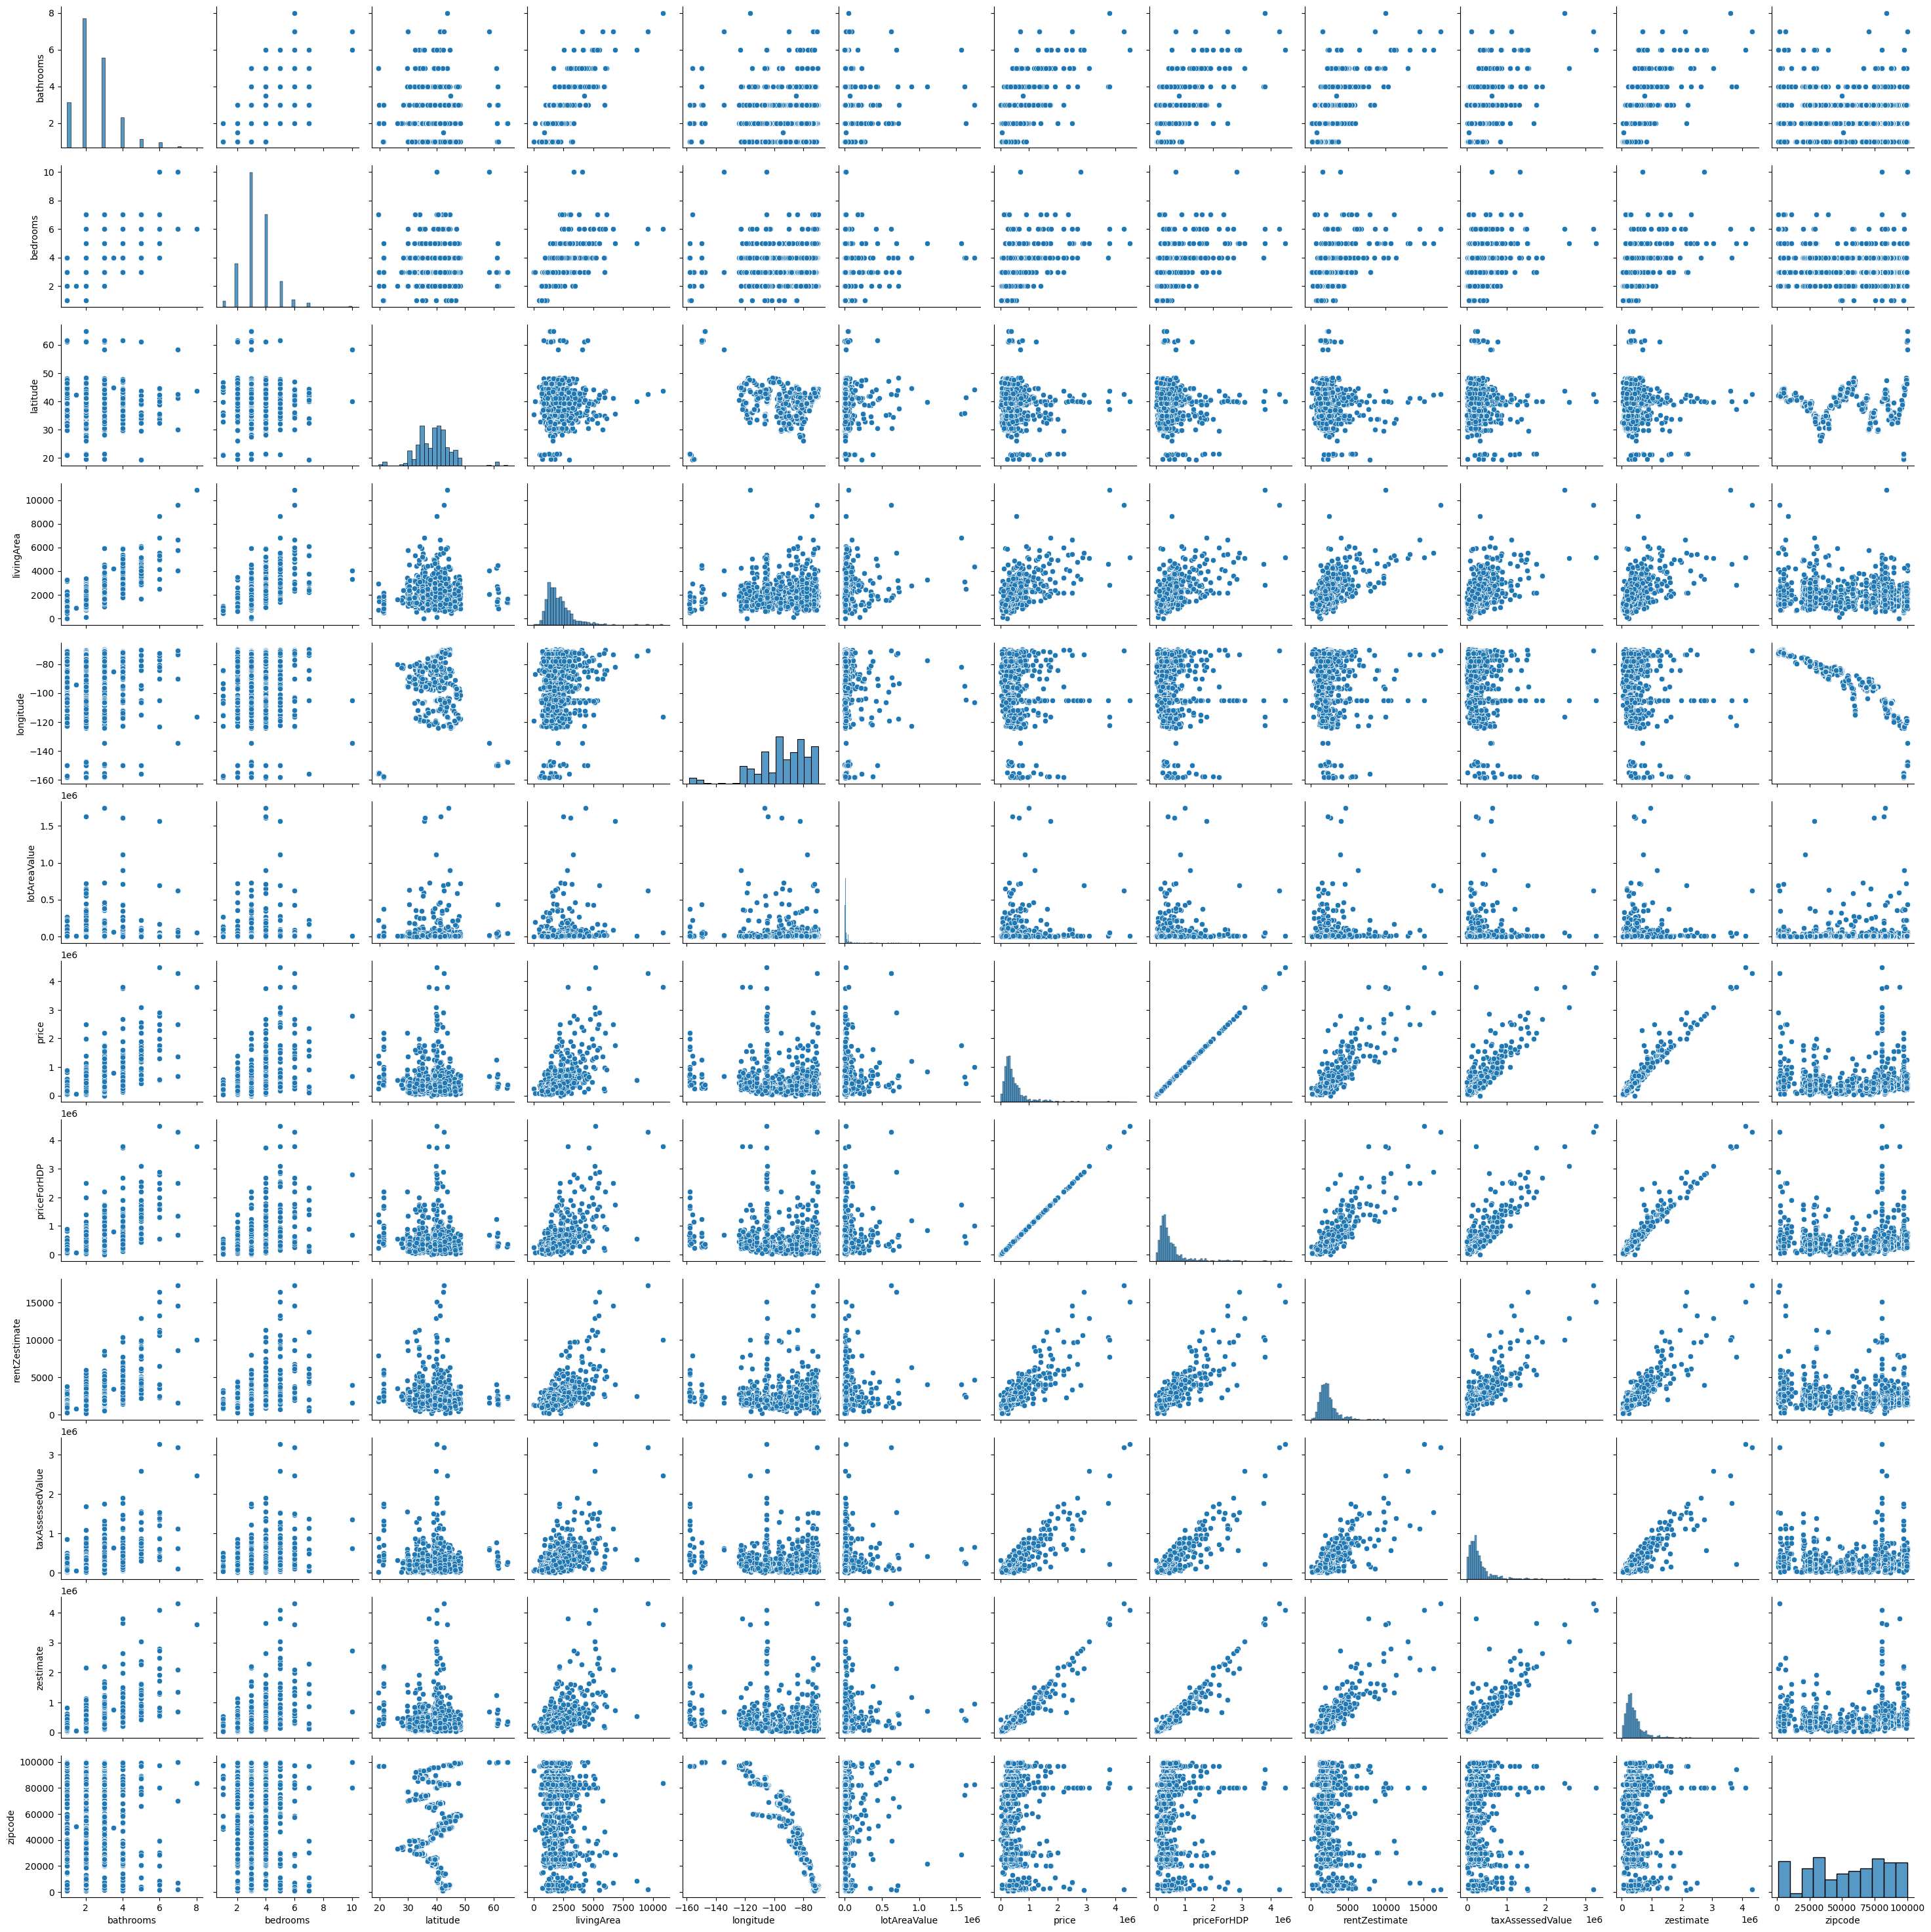

In [43]:
sns.pairplot(data=Housing_Data)

([<matplotlib.axis.YTick at 0x19b348e4400>,
 [Text(0, 0, '0'),
  Text(0, 1, '$1M'),
  Text(0, 2, '$2M'),
  Text(0, 3, '$3M'),
  Text(0, 4, '$4M')])

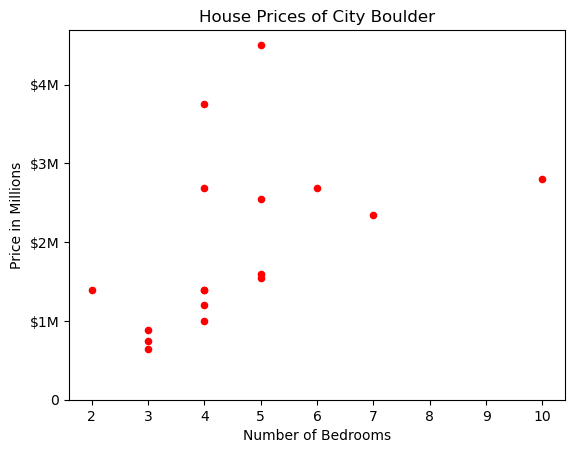

In [6]:
Boulder_Data=Housing_Data[Housing_Data['city']=='Boulder']
Boulder_Data.plot(x='bedrooms',y='priceinmil',kind='scatter',color='red')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')
plt.title('House Prices of City Boulder')
y_tick_labels = ['0', '$1M', '$2M', '$3M', '$4M']
plt.yticks(ticks=[0,1,2,3,4],labels=y_tick_labels)

In [116]:
Housing_Data['priceinmil']=Housing_Data['price']/1000000

In [117]:
Housing_Data['lotArea']=Housing_Data['lotAreaValue']/1000

In [7]:
states=['WA','ND','MN','MI','TX','IL','KS','TN','CO','OK']
top_states=Housing_Data[Housing_Data['state'].isin(states)]

([<matplotlib.axis.YTick at 0x19b350733d0>,
 [Text(0, 0, '0'),
  Text(0, 1, '$1M'),
  Text(0, 2, '$2M'),
  Text(0, 3, '$3M'),
  Text(0, 4, '$4M')])

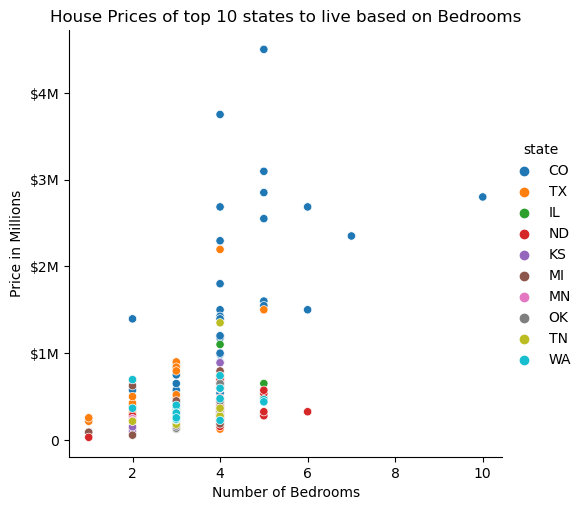

In [8]:
sns.relplot(data=top_states,x='bedrooms',y='priceinmil',hue='state')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')
plt.title('House Prices of top 10 states to live based on Bedrooms')
y_tick_labels = ['0', '$1M', '$2M', '$3M', '$4M']
plt.yticks(ticks=[0,1,2,3,4],labels=y_tick_labels)


([<matplotlib.axis.YTick at 0x19b35144af0>,
 [Text(0, 0, '0'),
  Text(0, 1, '$1M'),
  Text(0, 2, '$2M'),
  Text(0, 3, '$3M'),
  Text(0, 4, '$4M')])

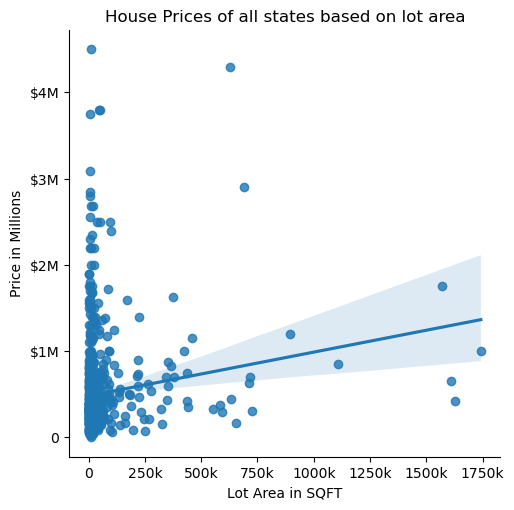

In [9]:
sns.lmplot(data=Housing_Data,x='lotArea',y='priceinmil')
plt.xlabel('Lot Area in SQFT')
plt.ylabel('Price in Millions')
plt.title('House Prices of all states based on lot area')
x_tick_labels = ['0', '250k', '500k', '750k', '1000k','1250k','1500k','1750k']
plt.xticks(ticks=[0,250,500,750,1000,1250,1500,1750],labels=x_tick_labels)
y_tick_labels = ['0', '$1M', '$2M', '$3M', '$4M']
plt.yticks(ticks=[0,1,2,3,4],labels=y_tick_labels)

([<matplotlib.axis.YTick at 0x19b35496e80>,
 [Text(0, 0, '0'),
  Text(0, 1, '$1M'),
  Text(0, 2, '$2M'),
  Text(0, 3, '$3M'),
  Text(0, 4, '$4M')])

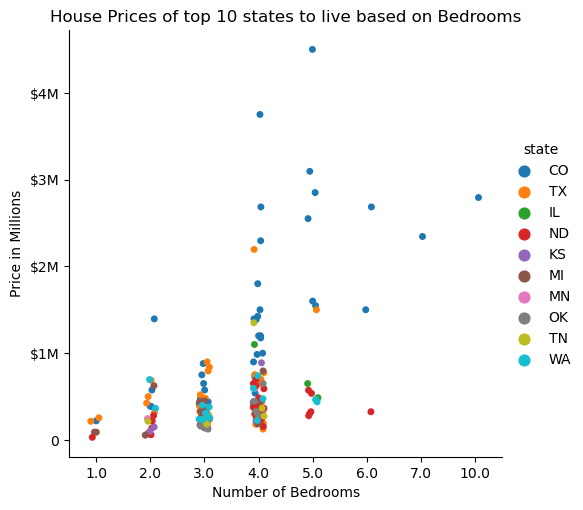

In [10]:
sns.catplot(data = top_states, x = 'bedrooms', y = 'priceinmil', hue = 'state')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')
plt.title('House Prices of top 10 states to live based on Bedrooms')
y_tick_labels = ['0', '$1M', '$2M', '$3M', '$4M']
plt.yticks(ticks=[0,1,2,3,4],labels=y_tick_labels)

In [11]:
colorado=Housing_Data[Housing_Data['state']=='CO']

([<matplotlib.axis.YTick at 0x19b358e10a0>,
 [Text(0, 0, '0'),
  Text(0, 1, '$1M'),
  Text(0, 2, '$2M'),
  Text(0, 3, '$3M'),
  Text(0, 4, '$4M')])

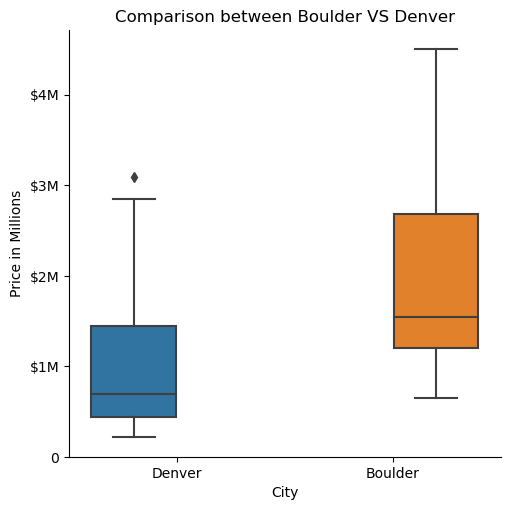

In [12]:
sns.catplot(data =colorado, x = 'city', y = 'priceinmil', kind = 'box', hue = 'city')
plt.xlabel('City')
plt.ylabel('Price in Millions')
plt.title('Comparison between Boulder VS Denver')
y_tick_labels = ['0', '$1M', '$2M', '$3M', '$4M']
plt.yticks(ticks=[0,1,2,3,4],labels=y_tick_labels)

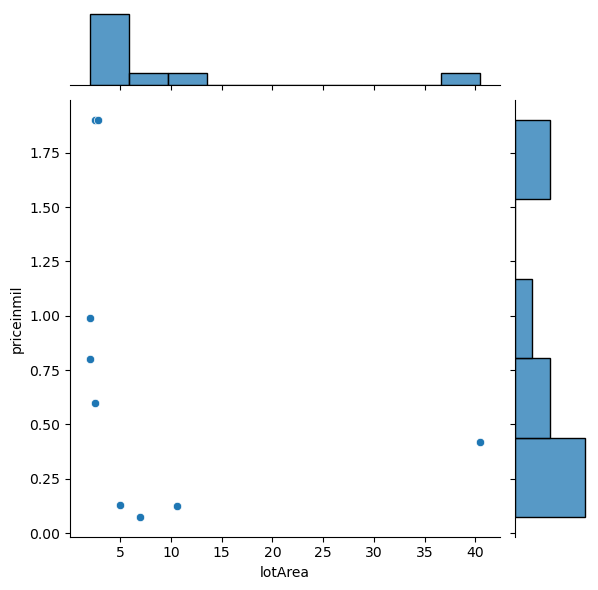

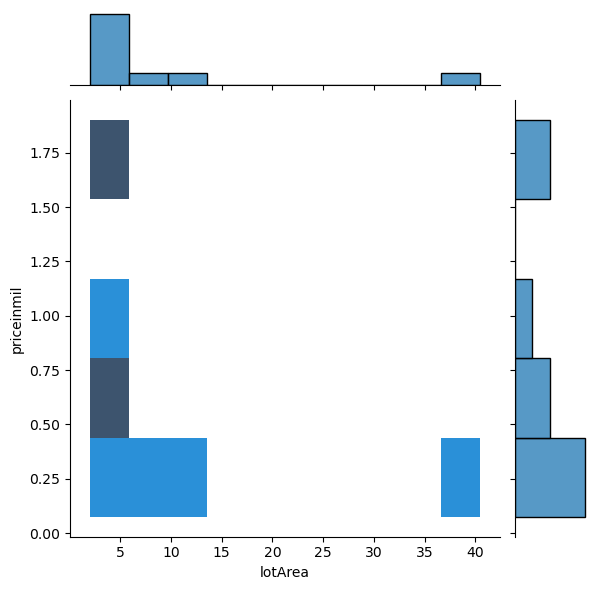

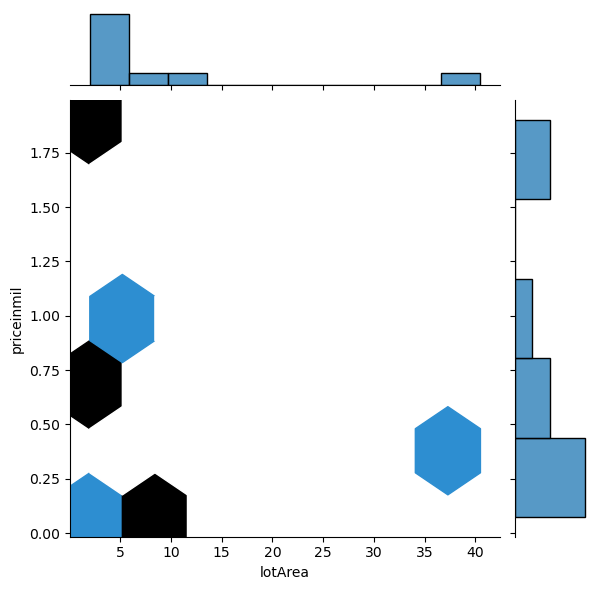

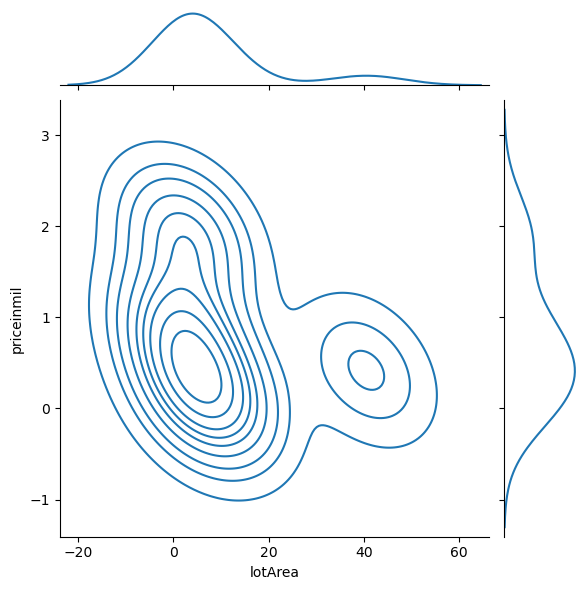

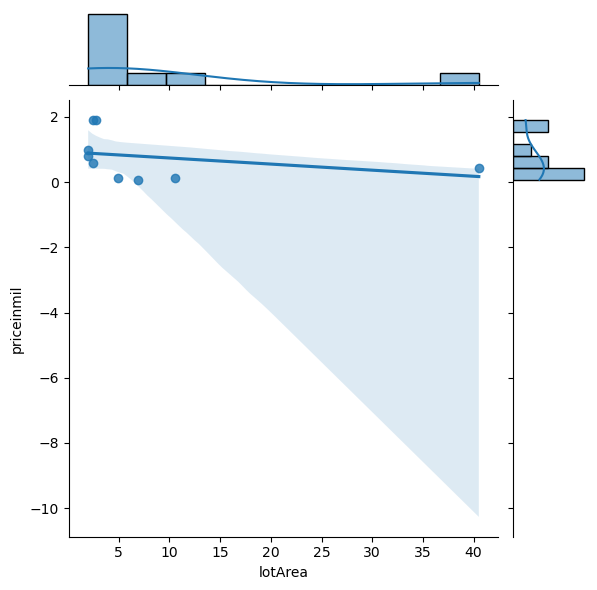

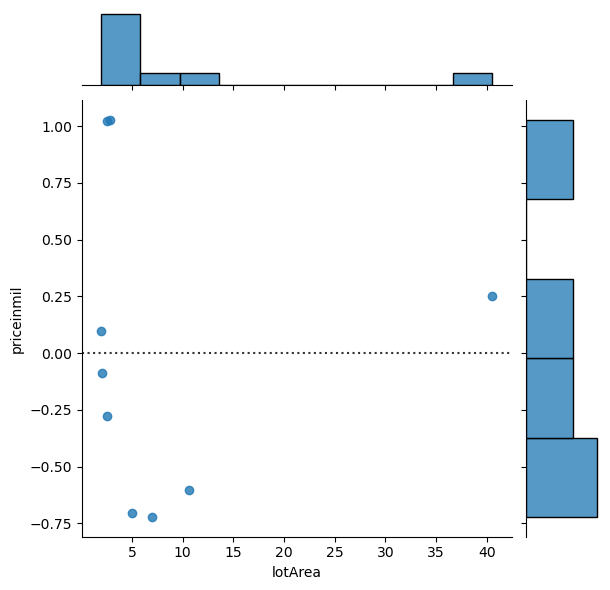

In [13]:

kind = ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid']
for k in kind:
  sns.jointplot(data = Housing_Data[Housing_Data['state']=='NY'], x = 'lotArea', y = 'priceinmil', kind = k)

<AxesSubplot:>

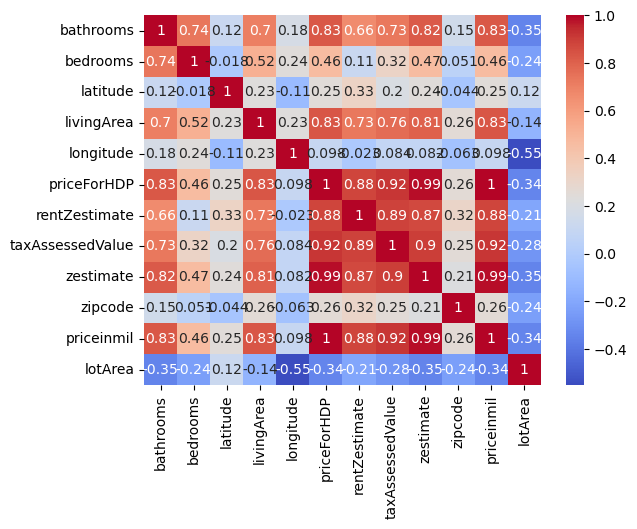

In [14]:

corr = Boulder_Data.corr()

# Draw a heatmap plot of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

([<matplotlib.axis.YTick at 0x19b3a5bd820>,
 [Text(0, -1, '-1'),
  Text(0, 0, '0'),
  Text(0, 1, '$1M'),
  Text(0, 2, '$2M'),
  Text(0, 3, '$3M'),
  Text(0, 4, '$4M'),
  Text(0, 5, '$5M')])

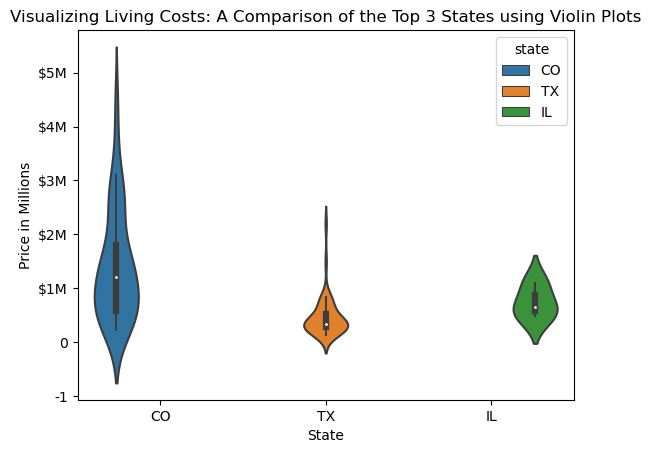

In [41]:
top_3=['CO','TX','IL']
top3=Housing_Data[Housing_Data['state'].isin(top_3)]
sns.violinplot(data =Housing_Data[Housing_Data['state'].isin(top_3)], x = 'state', y = 'priceinmil', kind = 'violin', hue = 'state')
plt.xlabel('State')
plt.ylabel('Price in Millions')
plt.title('Visualizing Living Costs: A Comparison of the Top 3 States using Violin Plots')
y_tick_labels = ['-1','0', '$1M', '$2M', '$3M', '$4M','$5M']
plt.yticks(ticks=[-1,0,1,2,3,4,5],labels=y_tick_labels)

([<matplotlib.axis.XTick at 0x19b3786d5e0>,
 [Text(0, 0, '0'),
  Text(1, 0, '$1M'),
  Text(2, 0, '$2M'),
  Text(3, 0, '$3M'),
  Text(4, 0, '$4M')])

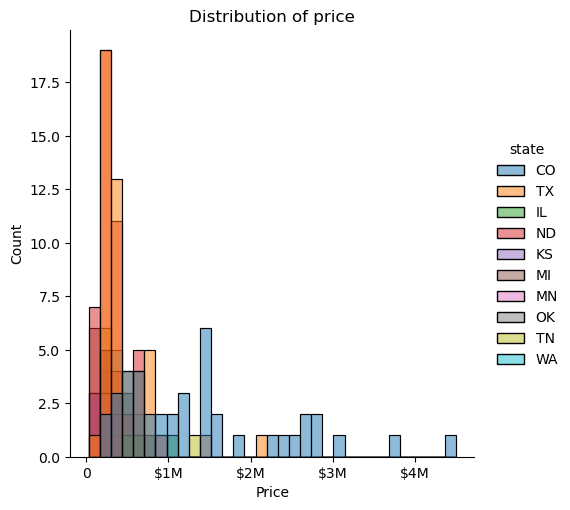

In [17]:
sns.displot(data = top_states, x = 'priceinmil', hue = 'state')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of price')
x_tick_labels = ['0', '$1M', '$2M', '$3M', '$4M']
plt.xticks(ticks=[0,1,2,3,4],labels=x_tick_labels)

([<matplotlib.axis.XTick at 0x19b370f5130>,
 [Text(0, 0, '0'),
  Text(1, 0, '$1M'),
  Text(2, 0, '$2M'),
  Text(3, 0, '$3M'),
  Text(4, 0, '$4M')])

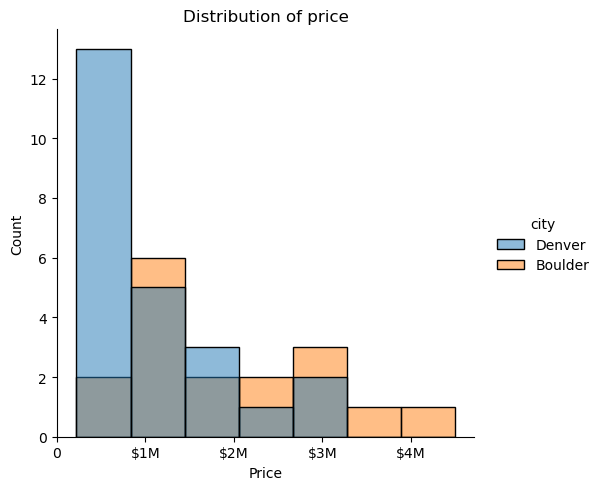

In [22]:
sns.displot(data = colorado, x = 'priceinmil', hue = 'city',col='state')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of price')
x_tick_labels = ['0', '$1M', '$2M', '$3M', '$4M']
plt.xticks(ticks=[0,1,2,3,4],labels=x_tick_labels)

([<matplotlib.axis.YTick at 0x19b3a924310>,
 [Text(0, 0, '0'),
  Text(0, 1, '$1M'),
  Text(0, 2, '$2M'),
  Text(0, 3, '$3M'),
  Text(0, 4, '$4M')])

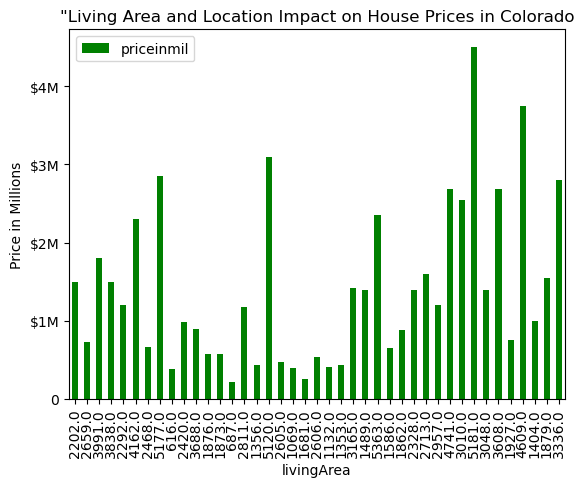

In [44]:
colorado.plot(x='livingArea',y='priceinmil',kind='bar',color='green')
plt.xlabel('livingArea')
plt.ylabel('Price in Millions')
plt.title('"Living Area and Location Impact on House Prices in Colorado')
y_tick_labels = ['0', '$1M', '$2M', '$3M', '$4M']
plt.yticks(ticks=[0,1,2,3,4],labels=y_tick_labels)

In [5]:
Housing_Data

,bathrooms,bedrooms,city,country,currency,latitude,livingArea,longitude,lotAreaUnit,priceForHDP,rentZestimate,state,streetAddress,taxAssessedValue,zestimate,zipcode,priceinmil,lotArea
0,4.0,4.0,Denver,USA,USD,39.724728,2202.0,-104.959140,sqft,1500000.0,3170.0,CO,530 University Boulevard,726200.0,1031000.0,80206,1.5000,3.6290
1,3.0,4.0,Denver,USA,USD,39.648630,2659.0,-105.055405,sqft,725000.0,2429.0,CO,3781 S Benton Way,444900.0,455700.0,80235,0.7250,12.2150
2,5.0,4.0,Denver,USA,USD,39.770897,3991.0,-105.013214,sqft,1800000.0,7454.0,CO,3926 Vallejo Street,621200.0,1395200.0,80211,1.8000,6.2500
3,5.0,6.0,Denver,USA,USD,39.665450,3838.0,-104.963524,sqft,1500000.0,3746.0,CO,2832 S Race Street,712500.0,1474576.0,80210,1.5000,8.7120
4,3.0,4.0,Denver,USA,USD,39.769943,2292.0,-105.021260,sqft,1200000.0,3405.0,CO,2730 W Denver Place,216300.0,870300.0,80211,1.2000,4.9050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,2.0,3.0,Mills,USA,USD,42.835503,3372.0,-106.413000,sqft,449900.0,2128.0,WY,1302 River Heights Dr,327731.0,431700.0,82604,0.4499,11.7612
839,2.0,4.0,Douglas,USA,USD,42.763844,2304.0,-105.382230,sqft,110000.0,1935.0,WY,403 N 4th St,135752.0,169900.0,82633,0.1100,11.3256
840,2.0,3.0,Evanston,USA,USD,41.254820,1150.0,-110.959460,sqft,159000.0,1195.0,WY,801 Sioux Dr,114419.0,149900.0,82930,0.1590,0.5760
841,4.0,6.0,Gillette,USA,USD,44.245415,5022.0,-105.562035,sqft,998000.0,3622.0,WY,5221 Rocky Point Dr,638339.0,728600.0,82718,0.9980,424.2744


In [6]:
# Removing Labels
Housing_Data_NoLbl = Housing_Data.drop(['rentZestimate','zestimate'],axis=1)
Housing_Data_NoLbl

,bathrooms,bedrooms,city,country,currency,latitude,livingArea,longitude,lotAreaUnit,priceForHDP,state,streetAddress,taxAssessedValue,zipcode,priceinmil,lotArea
0,4.0,4.0,Denver,USA,USD,39.724728,2202.0,-104.959140,sqft,1500000.0,CO,530 University Boulevard,726200.0,80206,1.5000,3.6290
1,3.0,4.0,Denver,USA,USD,39.648630,2659.0,-105.055405,sqft,725000.0,CO,3781 S Benton Way,444900.0,80235,0.7250,12.2150
2,5.0,4.0,Denver,USA,USD,39.770897,3991.0,-105.013214,sqft,1800000.0,CO,3926 Vallejo Street,621200.0,80211,1.8000,6.2500
3,5.0,6.0,Denver,USA,USD,39.665450,3838.0,-104.963524,sqft,1500000.0,CO,2832 S Race Street,712500.0,80210,1.5000,8.7120
4,3.0,4.0,Denver,USA,USD,39.769943,2292.0,-105.021260,sqft,1200000.0,CO,2730 W Denver Place,216300.0,80211,1.2000,4.9050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,2.0,3.0,Mills,USA,USD,42.835503,3372.0,-106.413000,sqft,449900.0,WY,1302 River Heights Dr,327731.0,82604,0.4499,11.7612
839,2.0,4.0,Douglas,USA,USD,42.763844,2304.0,-105.382230,sqft,110000.0,WY,403 N 4th St,135752.0,82633,0.1100,11.3256
840,2.0,3.0,Evanston,USA,USD,41.254820,1150.0,-110.959460,sqft,159000.0,WY,801 Sioux Dr,114419.0,82930,0.1590,0.5760
841,4.0,6.0,Gillette,USA,USD,44.245415,5022.0,-105.562035,sqft,998000.0,WY,5221 Rocky Point Dr,638339.0,82718,0.9980,424.2744


In [7]:
Housing_Data_Nolb1_Nu = Housing_Data_NoLbl.select_dtypes(include=['number'])
Housing_Data_Nolb1_Nu

,bathrooms,bedrooms,latitude,livingArea,longitude,priceForHDP,taxAssessedValue,zipcode,priceinmil,lotArea
0,4.0,4.0,39.724728,2202.0,-104.959140,1500000.0,726200.0,80206,1.5000,3.6290
1,3.0,4.0,39.648630,2659.0,-105.055405,725000.0,444900.0,80235,0.7250,12.2150
2,5.0,4.0,39.770897,3991.0,-105.013214,1800000.0,621200.0,80211,1.8000,6.2500
3,5.0,6.0,39.665450,3838.0,-104.963524,1500000.0,712500.0,80210,1.5000,8.7120
4,3.0,4.0,39.769943,2292.0,-105.021260,1200000.0,216300.0,80211,1.2000,4.9050
...,...,...,...,...,...,...,...,...,...,...
838,2.0,3.0,42.835503,3372.0,-106.413000,449900.0,327731.0,82604,0.4499,11.7612
839,2.0,4.0,42.763844,2304.0,-105.382230,110000.0,135752.0,82633,0.1100,11.3256
840,2.0,3.0,41.254820,1150.0,-110.959460,159000.0,114419.0,82930,0.1590,0.5760
841,4.0,6.0,44.245415,5022.0,-105.562035,998000.0,638339.0,82718,0.9980,424.2744


In [27]:
Housing_Data_Nolb1_Nu_1=Housing_Data_Nolb1_Nu.copy()
Housing_Data_Nolb1_Nu_1.to_csv('Housing_Data_Nolb1_Nu_1.csv')

In [10]:

Housing_Data_Nolb1_Nu_sample = Housing_Data_Nolb1_Nu.sample(n=200, random_state=42)

# print the first 5 rows of the sample DataFrame to verify that the sampling worked
Housing_Data_Nolb1_Nu_sample

,bathrooms,bedrooms,latitude,livingArea,longitude,priceForHDP,taxAssessedValue,zipcode,priceinmil,lotArea
493,1.0,3.0,37.090595,1077.0,-94.53945,137500.0,46770.0,64801,0.1375,12.19680
215,3.0,4.0,32.916492,2035.0,-80.12657,372000.0,198732.0,29420,0.3720,10.01880
622,3.0,4.0,46.908290,2896.0,-98.68374,299000.0,296300.0,58401,0.2990,18.60012
737,1.0,2.0,38.661960,960.0,-112.16322,224900.0,100794.0,84724,0.2249,40.07520
63,2.0,4.0,29.578120,2253.0,-95.23194,225000.0,223335.0,77089,0.2250,7.81902
...,...,...,...,...,...,...,...,...,...,...
299,3.0,4.0,43.940630,2955.0,-116.91185,625000.0,503045.0,83619,0.6250,41.38200
824,1.0,2.0,42.062534,1012.0,-104.17733,135000.0,102931.0,82240,0.1350,7.00000
581,3.0,3.0,40.326244,2406.0,-74.03429,865000.0,626200.0,7739,0.8650,20.03760
651,4.0,4.0,35.825493,3100.0,-95.04372,650000.0,269700.0,74464,0.6500,1611.72000


In [18]:
scaler = MinMaxScaler()
Housing_Data_Nolb1_Nu_norm = pd.DataFrame(scaler.fit_transform(Housing_Data_Nolb1_Nu_sample), columns=Housing_Data_Nolb1_Nu_sample.columns)
Housing_Data_Nolb1_Nu_norm

,bathrooms,bedrooms,latitude,livingArea,longitude,priceForHDP,taxAssessedValue,zipcode,priceinmil,lotArea
0,0.000000,0.333333,0.414870,0.094878,0.725161,0.030555,0.010659,0.646545,0.030555,0.007493
1,0.333333,0.500000,0.315207,0.275940,0.890516,0.082666,0.057246,0.287417,0.082666,0.006155
2,0.333333,0.500000,0.649283,0.438669,0.677615,0.066444,0.087158,0.581583,0.066444,0.011426
3,0.000000,0.166667,0.452389,0.072765,0.522969,0.049978,0.027222,0.848770,0.049978,0.024619
4,0.166667,0.500000,0.235498,0.317142,0.717216,0.050000,0.064789,0.771273,0.050000,0.004803
...,...,...,...,...,...,...,...,...,...,...
195,0.333333,0.500000,0.578426,0.449820,0.468489,0.138889,0.150540,0.837554,0.138889,0.025421
196,0.000000,0.166667,0.533583,0.082593,0.614588,0.030000,0.027877,0.823557,0.030000,0.004300
197,0.333333,0.333333,0.492126,0.346059,0.960411,0.192222,0.188295,0.067347,0.192222,0.012309
198,0.500000,0.500000,0.384664,0.477225,0.719376,0.144444,0.079003,0.744628,0.144444,0.990099


In [88]:
silhouette_score1 = []
sum_of_sq_dist = {}
for n_clusters in range(2,6):
    clusterer = KMeans(n_clusters=n_clusters, n_init=10,random_state=10)
    preds = clusterer.fit_predict(Housing_Data_Nolb1_Nu_sample)
    centers = clusterer.cluster_centers_
    sum_of_sq_dist[n_clusters] = clusterer.inertia_
    score = silhouette_score(Housing_Data_Nolb1_Nu_sample, preds)
    silhouette_score1.append([int(n_clusters) , round(score , 3)])

In [89]:
Kmeans_1 = pd.DataFrame(silhouette_score1 , columns = ["No of Clusters" , "Silhouette Score"])

Text(0.5, 1.0, 'Determining K value using Silhouette Method')

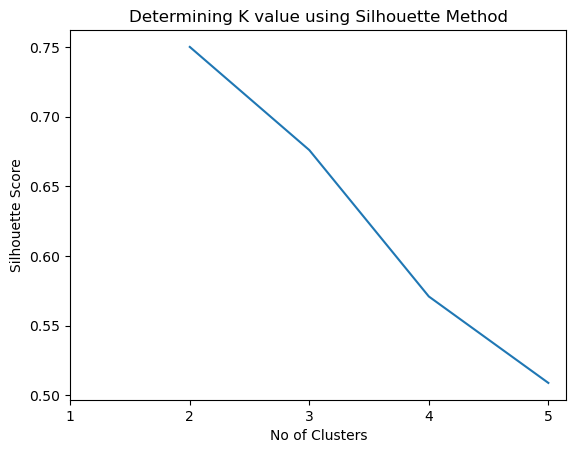

In [106]:
_ = sns.lineplot(x = Kmeans_1['No of Clusters'], y = Kmeans_1['Silhouette Score'])
_ = plt.xticks(ticks = np.arange(1,6,1))
plt.title("Determining K value using Silhouette Method")

For n_clusters = 2 The average silhouette_score is : 0.7502227749140534
For n_clusters = 3 The average silhouette_score is : 0.6755044480131244
For n_clusters = 4 The average silhouette_score is : 0.5706413534829069
For n_clusters = 5 The average silhouette_score is : 0.5086442890329724


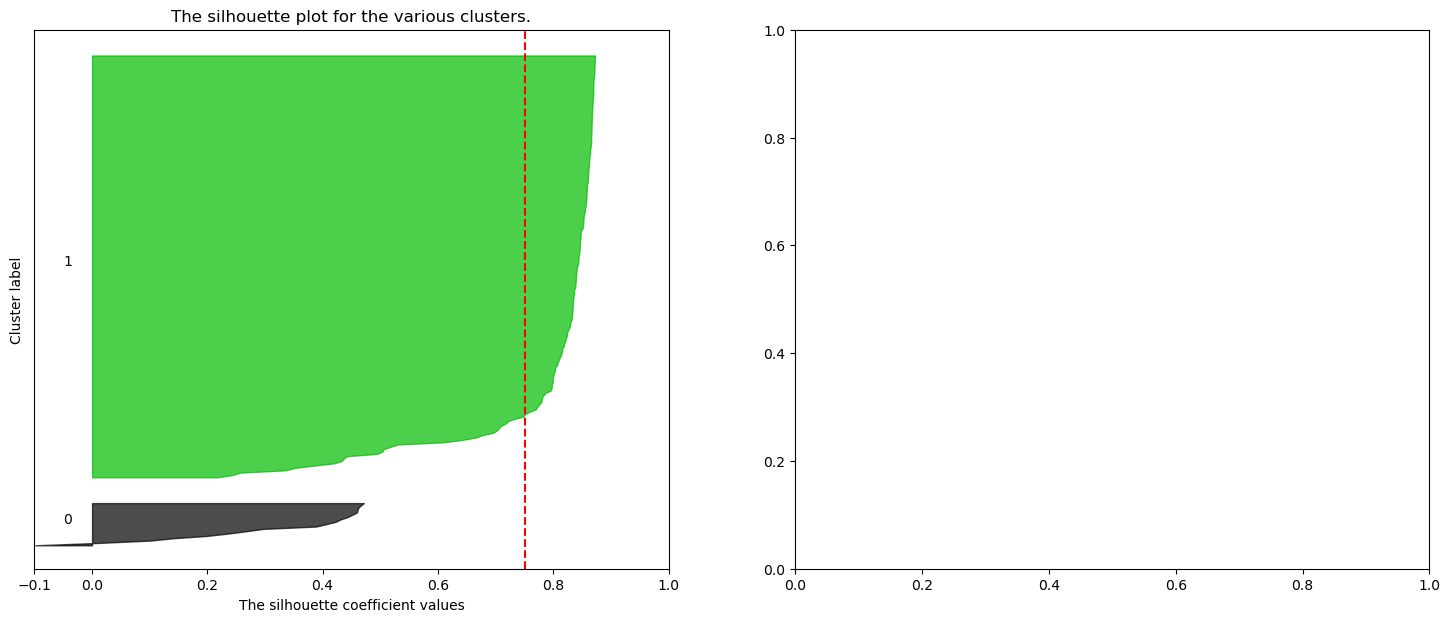

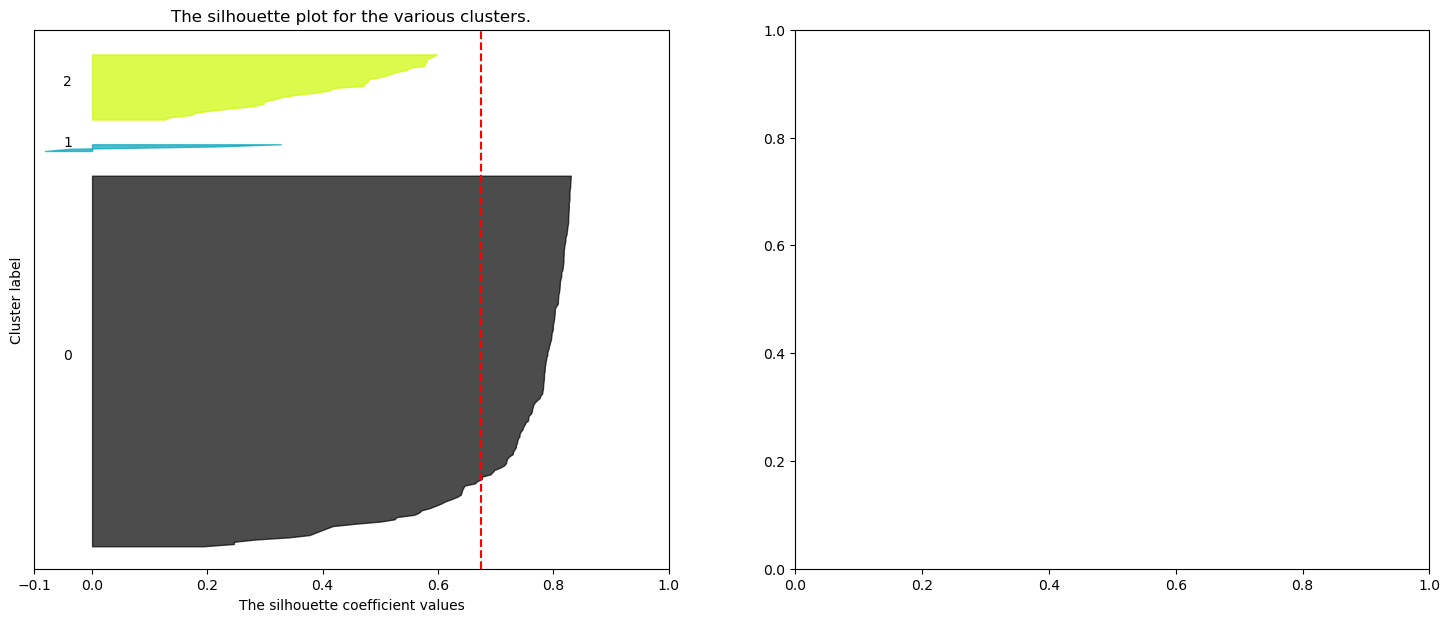

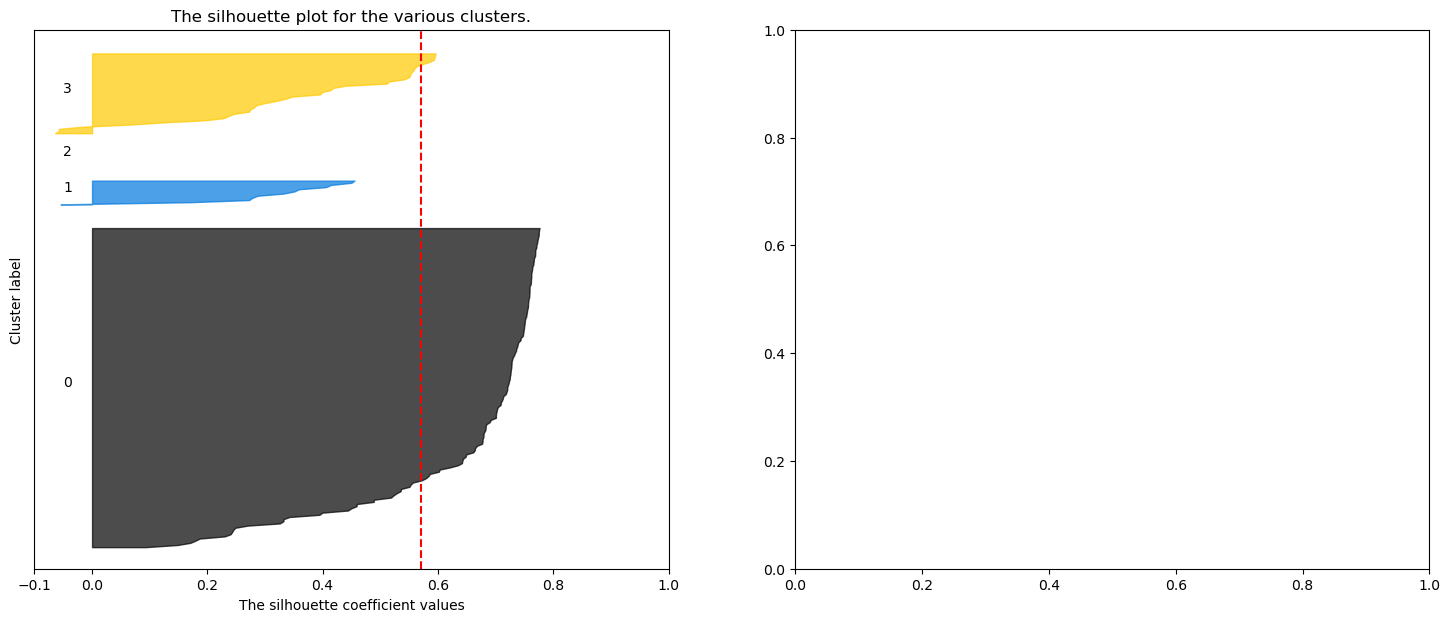

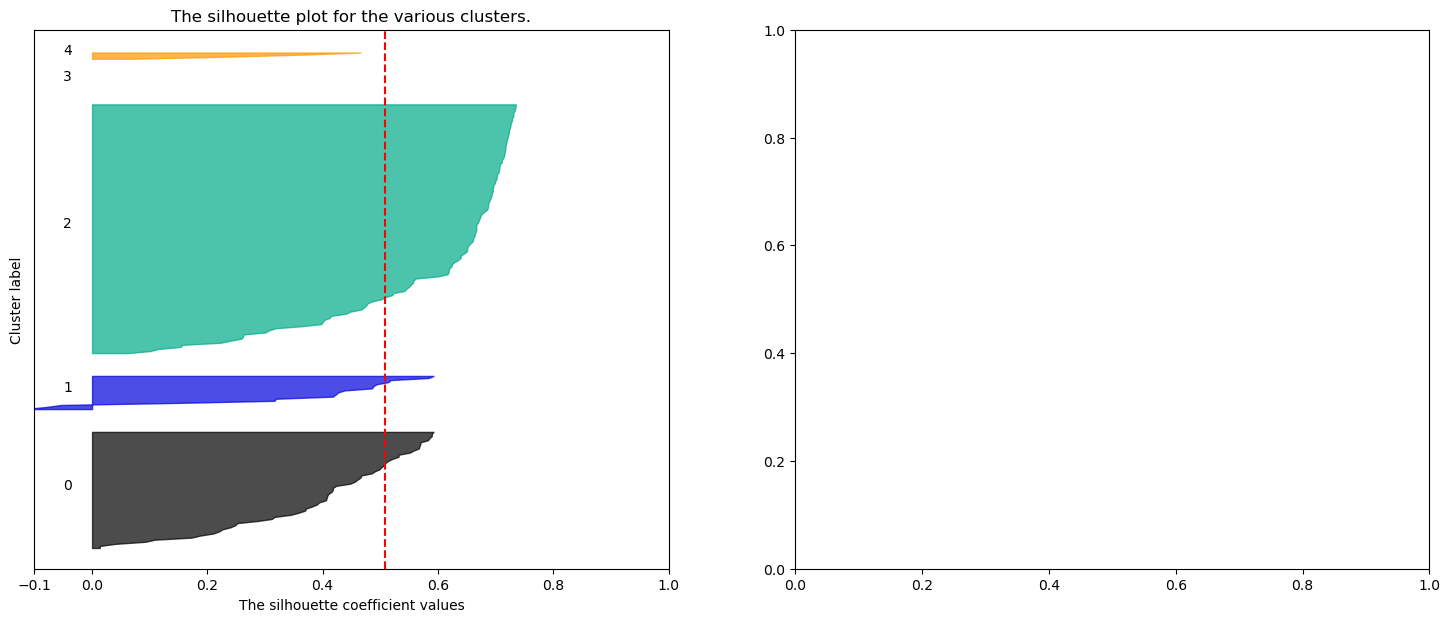

In [94]:
range_n_clusters = [i for i in range(2,6)]

                          
silhouette_score1 = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Housing_Data_Nolb1_Nu_sample) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Housing_Data_Nolb1_Nu_sample)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Housing_Data_Nolb1_Nu_sample, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Housing_Data_Nolb1_Nu_sample, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



plt.show()

In [124]:
clusterer = KMeans(n_clusters= 2, n_init=10,random_state=10)
preds = clusterer.fit_predict(Housing_Data_Nolb1_Nu_norm)

In [125]:
predictions = pd.DataFrame(preds, columns = ['Clusters'])

In [126]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)

In [127]:
reduced = pd.DataFrame(pca.fit_transform(Housing_Data_Nolb1_Nu_sample), columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])
kmeans_cluster = pd.concat([reduced, predictions], axis=1)

In [128]:
hundred_colors = " #000000 dimgray #696969 silver #c0c0c0 darkslategray #2f4f4f darkolivegreen #556b2f olivedrab #6b8e23 sienna #a0522d seagreen #2e8b57 forestgreen #228b22 maroon2 #7f0000 midnightblue #191970 darkgreen #006400 olive #808000 darkslateblue #483d8b firebrick #b22222 lightslategray #778899 mediumseagreen #3cb371 rosybrown #bc8f8f rebeccapurple #663399 darkgoldenrod #b8860b darkkhaki #bdb76b darkcyan #008b8b steelblue #4682b4 chocolate #d2691e yellowgreen #9acd32 darkblue #00008b indigo #4b0082 limegreen #32cd32 darkseagreen #8fbc8f darkmagenta #8b008b maroon3 #b03060 mediumturquoise #48d1cc mediumaquamarine #66cdaa darkorchid #9932cc orangered #ff4500 orange #ffa500 gold #ffd700 yellow #ffff00 mediumvioletred #c71585 mediumblue #0000cd burlywood #deb887 chartreuse #7fff00 lime #00ff00 mediumorchid #ba55d3 springgreen #00ff7f darksalmon #e9967a crimson #dc143c aqua #00ffff deepskyblue #00bfff sandybrown #f4a460 mediumpurple #9370db blue #0000ff purple3 #a020f0 lightcoral #f08080 greenyellow #adff2f tomato #ff6347 thistle #d8bfd8 fuchsia #ff00ff palevioletred #db7093 khaki #f0e68c laserlemon #ffff54 cornflower #6495ed plum #dda0dd lightgreen #90ee90 lightblue #add8e6 deeppink #ff1493 mediumslateblue #7b68ee violet #ee82ee lightskyblue #87cefa aquamarine #7fffd4 lightgoldenrod #fafad2 hotpink #ff69b4 mistyrose #ffe4e1 lightcyan #e0ffff pink #ffc0cb"
colors = [color for color in hundred_colors.split(' ') if '#' in color]

#looping to shuffle colors
np.random.seed(151203)
shuffled = []
while len(colors)!=0:
  a = np.random.choice(colors)
  shuffled.append(a)
  colors.remove(a)

In [129]:
gyr = shuffled[:pd.Series(preds).nunique()]

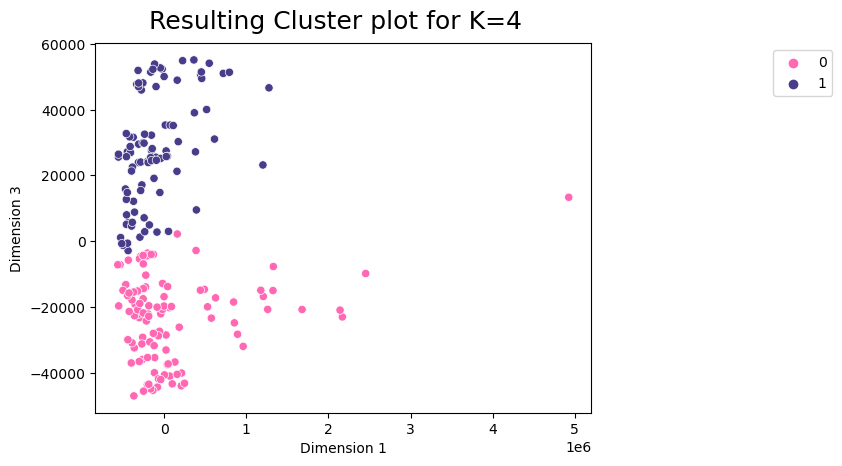

In [130]:
from matplotlib import transforms
plt.suptitle("Resulting Cluster plot for K=4", fontsize=18, y=0.95)

palette = {0: "C0", 1: "C1", 2: "C2", 3: "C3", 4: "C4", 5: "C5",
           6: "C6", 7: "C7", 8: "C8", 9: "C9", 10: "C10", 11: "C11",
           12: "C12", 13: "C13", 14: "C14", 15: "C15", 16: "C16"}
sns.scatterplot(x = 'Dimension 1', y = 'Dimension 3', data = kmeans_cluster, hue = 'Clusters',palette = sns.color_palette(gyr))
plt.legend(bbox_to_anchor=(1.5,1))

In [131]:
from scipy.cluster.hierarchy import dendrogram, linkage
hier_clust = linkage(Housing_Data_Nolb1_Nu_norm, method='ward',metric = 'euclidean')

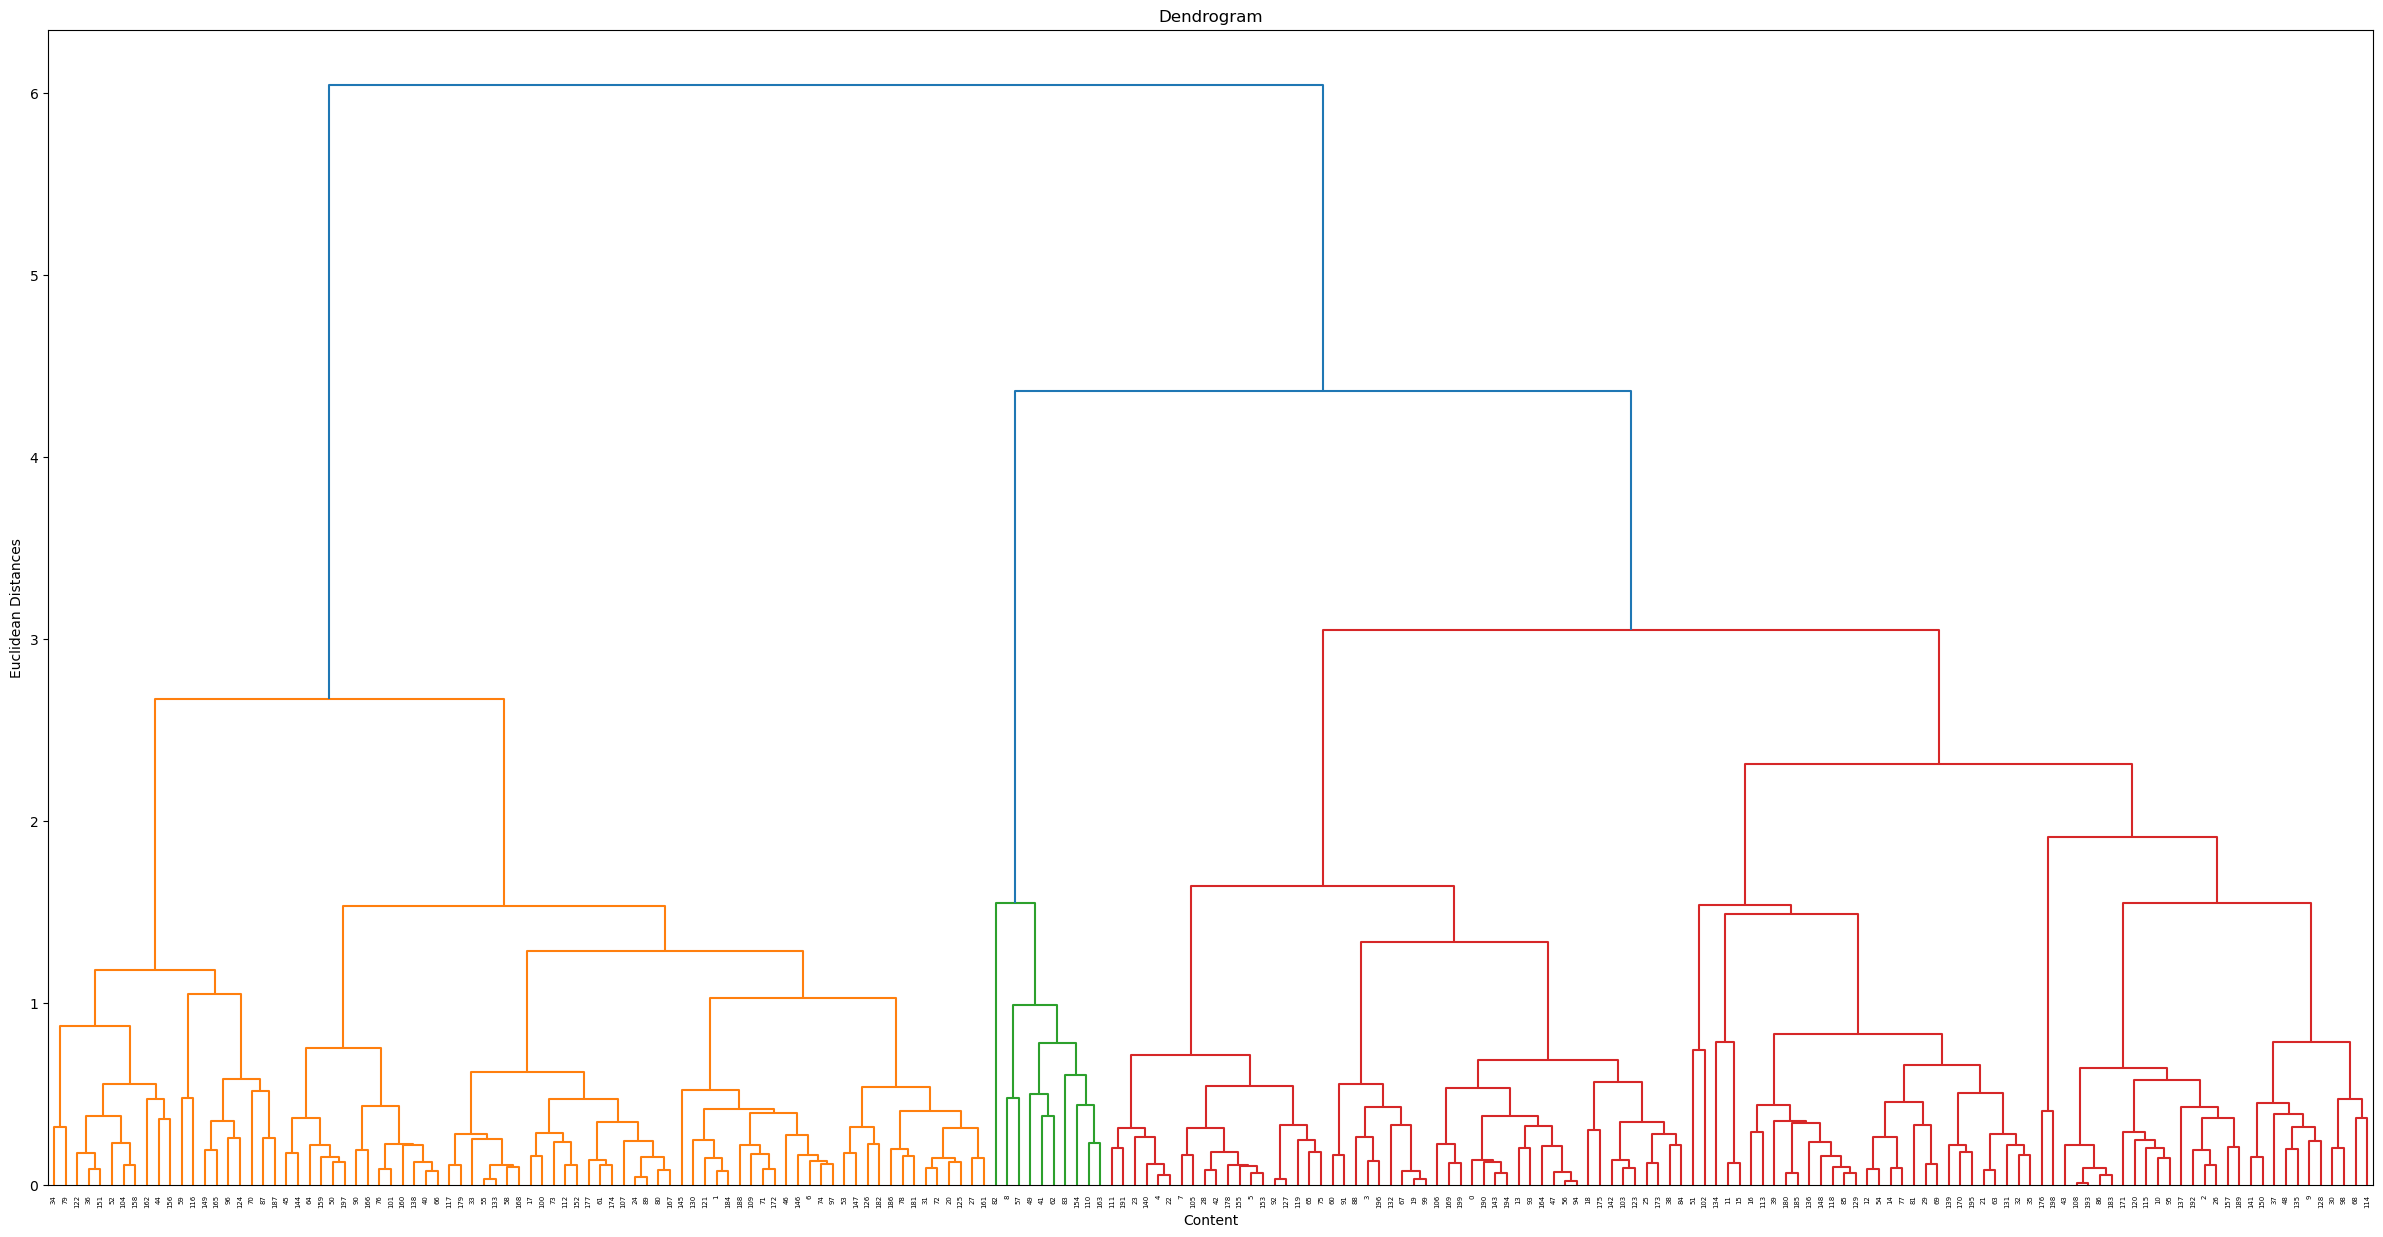

In [104]:
plt.figure(figsize=(30,15))
dendrogram(hier_clust, p=2)
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()